In [53]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white",color_codes=True)
sns.set(font_scale=1.5)


In [54]:
#load data
df_insurance=pd.read_csv("Dataset/insurance2.csv")
df_insurance.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [55]:
df_insurance.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [56]:
df_insurance.describe()


,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [61]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


                     age       sex       bmi  children    smoker    region  \
age             1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127   
sex            -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588   
bmi             0.109272  0.046371  1.000000  0.012759  0.003750  0.157566   
children        0.042469  0.017163  0.012759  1.000000  0.007673  0.016569   
smoker         -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181   
region          0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000   
charges         0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208   
insuranceclaim  0.113723  0.031565  0.384198 -0.409526  0.333261  0.020891   

                 charges  insuranceclaim  
age             0.299008        0.113723  
sex             0.057292        0.031565  
bmi             0.198341        0.384198  
children        0.067998       -0.409526  
smoker          0.787251        0.333261  
region         -0.006208        0.02089

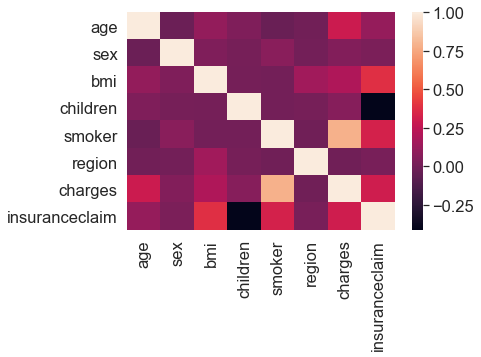

In [62]:
#find correlation of every pair of feature with the target variable
corr = df_insurance.corr()
print(corr)
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [ ]:
#Before using machine learning, let's us normalize our inputs. 
#Machine Learning models often benefit substantially from input normalization.
#It also makes it easier to understand the importance of each feature later, when looking at the model weights.
#Normalize the data such that each variable has 0 mean and standard deviation of 1.

In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,classification_report,f1_score
from sklearn import metrics

from math import sqrt

In [65]:
df_insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [66]:
use_columns=['age', 'bmi', 'children', 'smoker', 'region','charges']
x_features=df_insurance[use_columns]
y_features=df_insurance.insuranceclaim

In [ ]:
#x_train,x_test,y_train,y_test=train_test_split(x_features,y_features,train_size=0.3)

#The data set consists of record of 1338 patients in total. 
#Using 1000 records for training and 300 records for testing, and the last 38 records to cross check our model.

In [99]:
dfTrain = df_insurance[:1000]
dfTest = df_insurance[1000:1300]
dfCheck = df_insurance[1300:]

In [100]:
trainLabel = np.asarray(dfTrain['insuranceclaim'])
trainData = np.asarray(dfTrain.drop('insuranceclaim',1))

testLabel = np.asarray(dfTest['insuranceclaim'])
testData = np.asarray(dfTest.drop('insuranceclaim',1))

In [101]:
#Before using machine learning, let's us normalize our inputs. 
#Machine Learning models often benefit substantially from input normalization. 
#It also makes it easier to understand the importance of each feature later, when looking at the model weights. 
#Normalize the data such that each variable has 0 mean and standard deviation of 1.

In [102]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [103]:
logreg=LogisticRegression()
logreg.fit(trainData,trainLabel)

C:\Users\18329\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [104]:
#Now use test data to find out accuracy of the model.

In [105]:
accuracy = logreg.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  85.66666666666667 %


In [106]:
predicted=logreg.predict(testData)
metrics.confusion_matrix(testLabel,predicted)

array([[106,  23],
       [ 20, 151]], dtype=int64)

In [107]:
print(metrics.accuracy_score(testLabel,predicted)* 100, "%")
print(metrics.precision_score(testLabel,predicted)* 100, "%")
print(metrics.f1_score(testLabel,predicted)* 100, "%")
print(metrics.recall_score(testLabel,predicted)* 100, "%")

85.66666666666667 %
86.7816091954023 %
87.53623188405797 %
88.30409356725146 %


In [108]:
#To get a better sense of what is going on inside the logistic regression model, 
#visualize how our model uses the different features and which features have greater effect.

Text(0.5, 0, 'Importance')

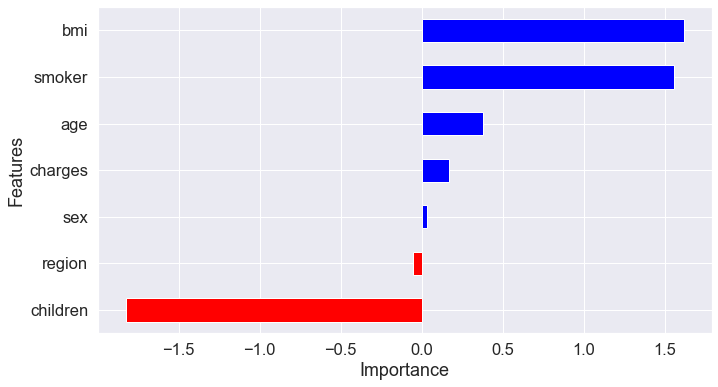

In [109]:
coeff = list(logreg.coef_[0])
labels = list(dfTrain.drop('insuranceclaim',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
#From the above figure,
#BMI, Smoker have significant influence on the model, specially BMI.
#Children has a negative influence on the prediction, i.e. higher number children / dependents are correlated 
#with a policyholder not taken insurance claim.
#Although age was more correlated than BMI to the output variables, the model relies more on BMI. This can happen for 
#several reasons, including the fact that the correlation captured by age is also captured by some other variable,
#whereas the information captured by BMI is not captured by other variables.